# `PROJECT NAME:` NETWORK ANALYSIS FOR MAY_2018 
### `STACK HOLDER:` TRAI AND OPERATORS
#### `PROJECT PURPOSE :` To visualize the the network (calls and data speed) and give the insight to stack_holder for conveniance of customer
#### ` DATA SOURCE:` https://data.gov.in/resources/crowd-source-data-mobile-speeds-all-india-during-may-2018

### `Necessary Library`

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline
import warnings


In [99]:
#pip install mpl_toolkits

## ` Call import`

In [10]:
call=pd.read_csv('MyCall_Data_2018_May_1.csv')
call.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Travelling,4G,5,Satisfactory,-1.000000,-1.000000,NaN
1,RJio,Travelling,4G,2,Poor Voice Quality,28.593588,77.164276,NCT
2,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN
3,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN
4,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN


#### `NULL VALUE IMPUTMENT`

In [11]:
call[['Latitude','Longitude']]=call[['Latitude','Longitude']].replace(-1,np.nan)

In [12]:
call['State Name']=call['State Name'].replace('NCT',np.nan)

In [13]:
call=call.fillna(method='bfill')

In [14]:
call.groupby(['Operator','Network Type'])['Network Type'].count()

Operator  Network Type
Airtel    2G                554
          3G               1972
          4G               2894
          Unknown          2221
BSNL      2G                721
          3G               1114
          4G                153
          Unknown          1540
Idea      2G                168
          3G               1065
          4G                790
          Unknown           802
MTNL      Unknown             2
Other     Unknown             9
RComm     2G                  2
RJio      4G              13349
          Unknown           315
Tata      3G                  8
          4G                  6
          Unknown           210
Telenor   2G                  1
          3G                 14
          4G                  2
          Unknown            28
Vodafone  2G                269
          3G               1385
          4G               1370
          Unknown          1017
Name: Network Type, dtype: int64

In [15]:
call['Network Type']=call['Network Type'].replace('Unknown',np.nan)

In [16]:
jio=call[call.Operator=='RJio']['Network Type']
jio=jio.fillna('4G')
jio.index
call['Network Type'].iloc[jio.index]=jio.values
call[call.Operator=='RJio']['Network Type']

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        4G
1        4G
8        4G
9        4G
10       4G
         ..
31972    4G
31975    4G
31976    4G
31978    4G
31979    4G
Name: Network Type, Length: 13664, dtype: object

In [17]:
call['Network Type'].iloc[jio.index]=jio.values

In [18]:
call['Network Type']=call['Network Type'].fillna(method='ffill')

In [19]:
index=jio[(jio=='3G')|(jio=='2G')]
call=call.drop(index)

In [20]:

call=call.drop(call[call.Operator=='RComm'].index)

In [21]:
call=call.drop(call[(call.Operator=='MTNL')|(call.Operator=='Other')].index)

### `Visualization`

#### `Univarent`

In [22]:
call.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31968 entries, 0 to 31980
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Operator            31968 non-null  object 
 1   In Out Travelling   31968 non-null  object 
 2   Network Type        31968 non-null  object 
 3   Rating              31968 non-null  int64  
 4   Call Drop Category  31968 non-null  object 
 5   Latitude            31968 non-null  float64
 6   Longitude           31968 non-null  float64
 7   State Name          31968 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.2+ MB


<BarContainer object of 7 artists>

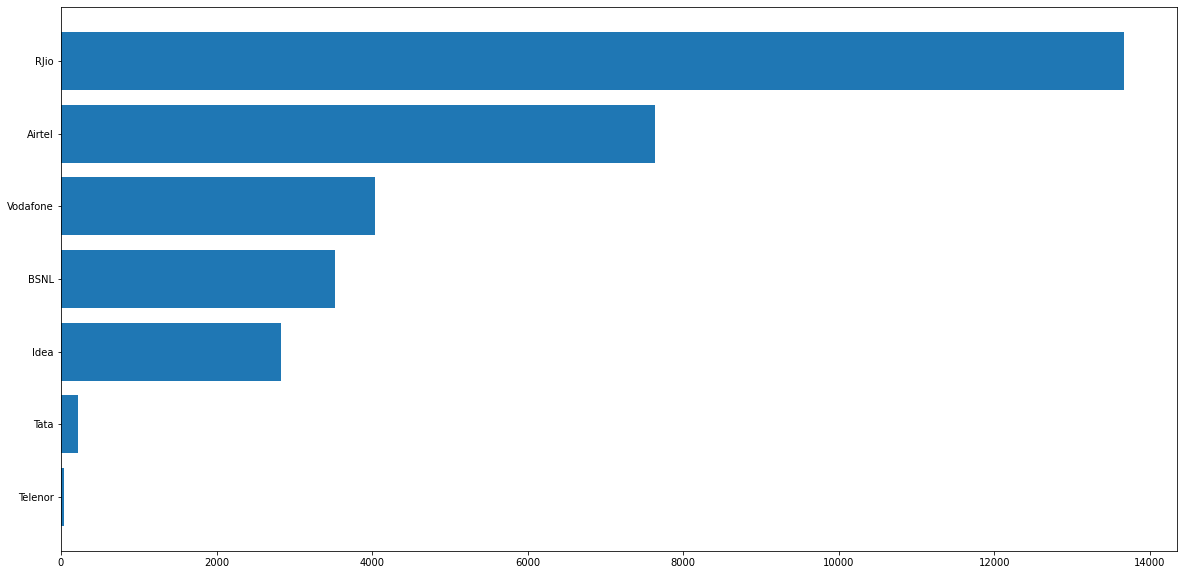

In [34]:
#Operator distribution
plt.figure(figsize=(20,10))
operator=call.Operator.value_counts().sort_values(ascending=True)
plt.barh(operator.index,operator.values)

`Here Jio is dominated in this data,means jio subscriber is more compared to other operator and airtel is on 2nd position and vodafpne is on 3rd and so on.....`

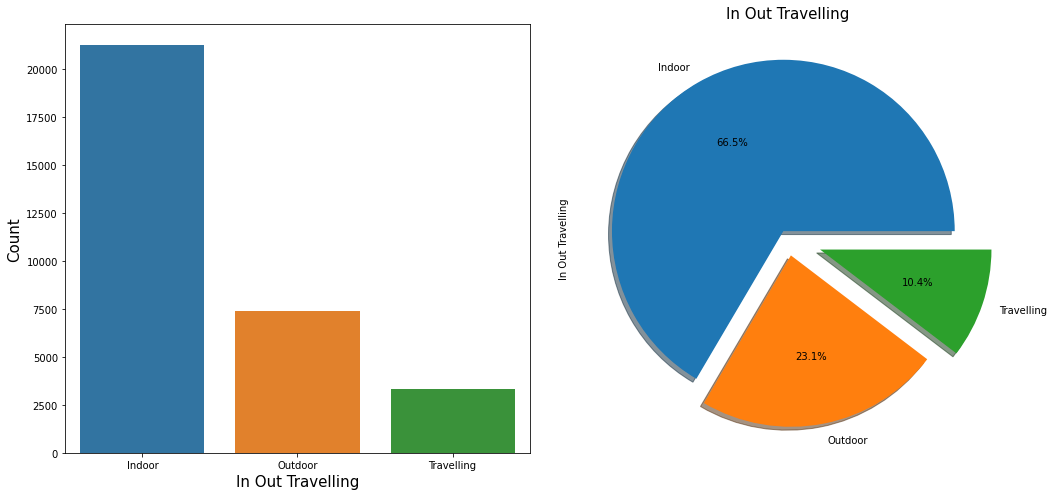

In [16]:
# In Out Travelling
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(call['In Out Travelling'],order = call['In Out Travelling'].value_counts().index)
plt.xlabel('In Out Travelling',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
call['In Out Travelling'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.05,0.1,0.2])
plt.title('In Out Travelling',fontsize=15)
plt.tight_layout()
plt.show()

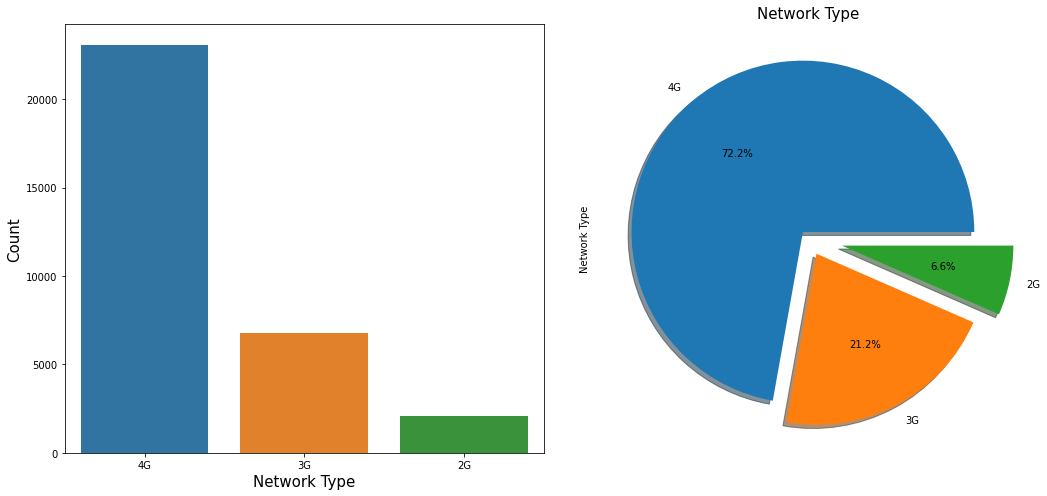

In [17]:
# Network Type
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(call['Network Type'],order = call['Network Type'].value_counts().index)
plt.xlabel('Network Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
call['Network Type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.05,0.1,0.2])
plt.title('Network Type',fontsize=15)
plt.tight_layout()
plt.show()

   `Here customer are using 4g SIM maximum as compaire to  other technology, as we know that now a day customer have 4g handset maximum and 4g is also latest technology so customer motivated towards 4g network but some customer who keep some handset for only calling and that handset is cheap so they are using 2g and 3g network `

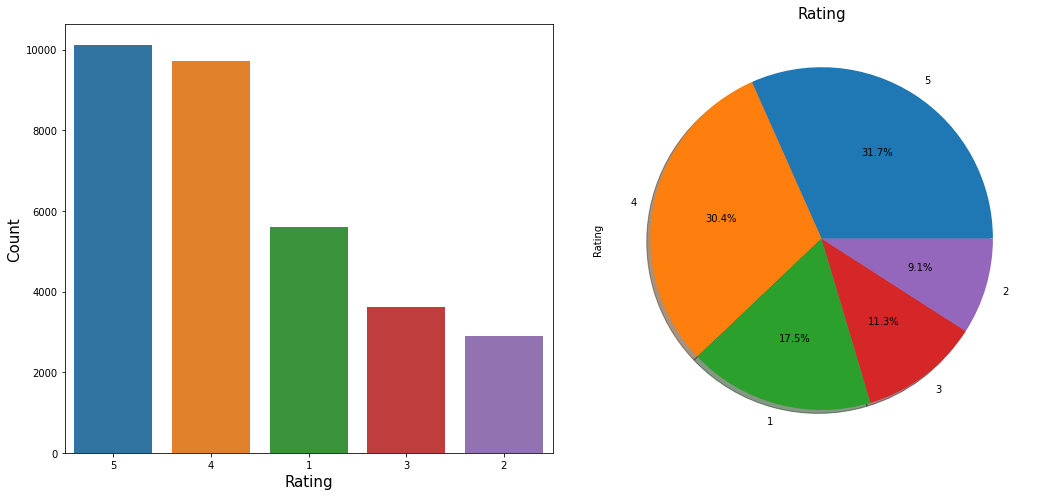

In [18]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(call['Rating'],order = call['Rating'].value_counts().index)
plt.xlabel('Rating',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
call['Rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)#,explode=[0.05,0.1,0.2])
plt.title('Rating',fontsize=15)
plt.tight_layout()
plt.show()

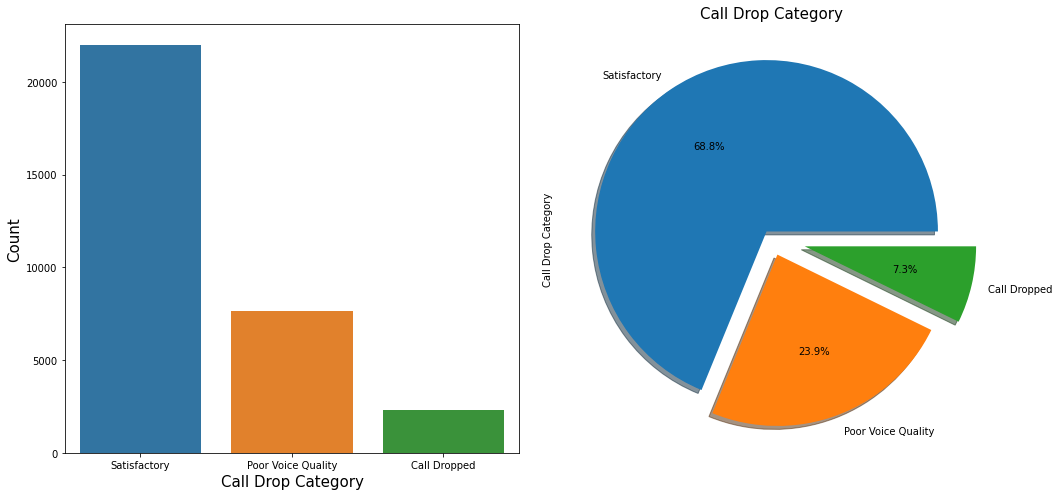

In [19]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(call['Call Drop Category'],order = call['Call Drop Category'].value_counts().index)
plt.xlabel('Call Drop Category',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
call['Call Drop Category'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.05,0.1,0.2])
plt.title('Call Drop Category',fontsize=15)
plt.tight_layout()
plt.show()

`Here call drop is % is high (7.2).it should bre less than 2% for ideal kpi.so operator should be maintain and keep  their kpi low.`

In [47]:
place=call['In Out Travelling'].unique()

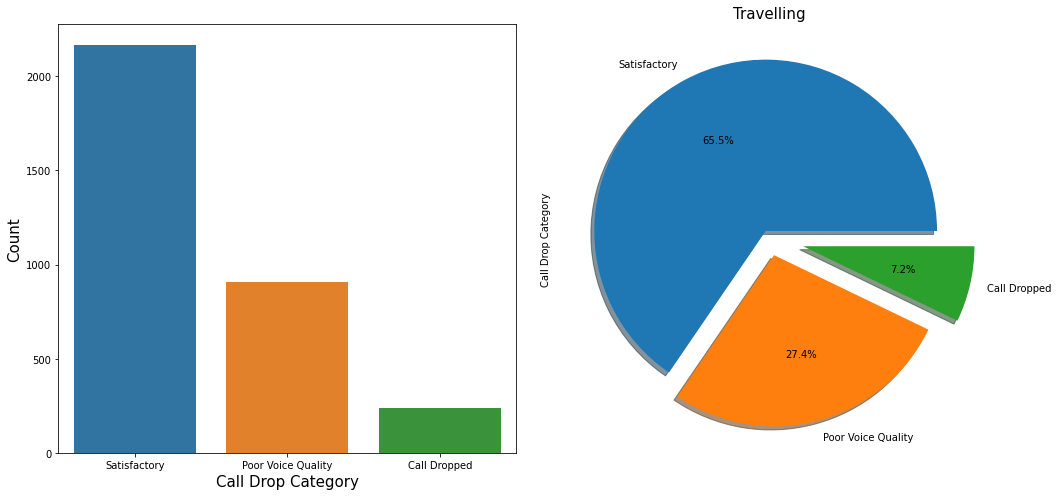

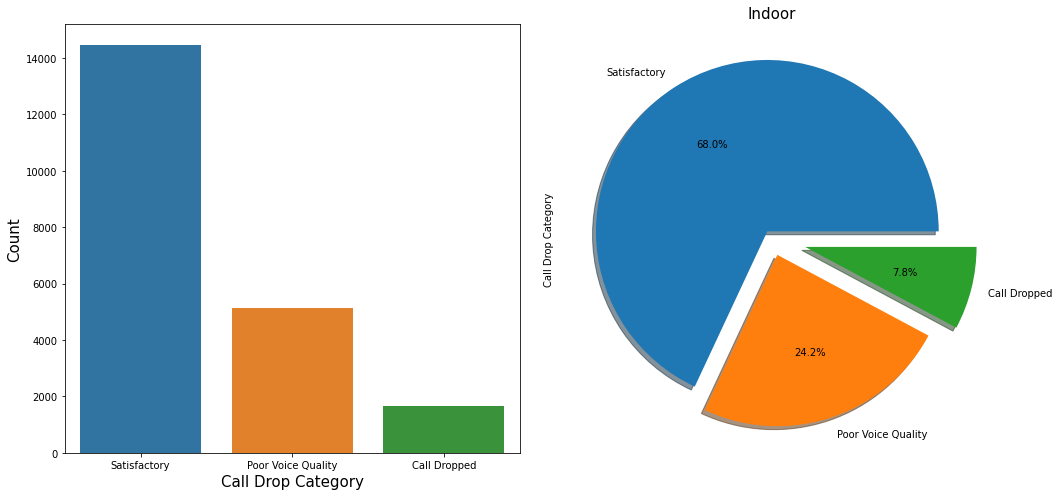

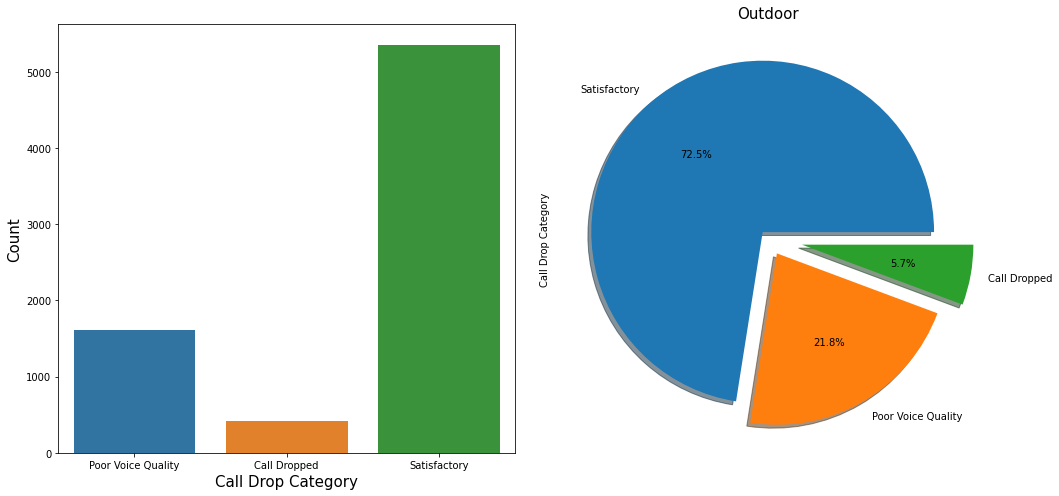

In [49]:
for i in place:
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    sns.countplot(call[call['In Out Travelling'].isin([i])]['Call Drop Category'])
    plt.xlabel('Call Drop Category',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.subplot(122)
    call[call['In Out Travelling'].isin([i])]['Call Drop Category'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.05,0.1,0.2])
    plt.title(i,fontsize=15)
    plt.tight_layout()
    plt.show()


In [66]:
rating_count=call.groupby(['Operator','Rating']).count()['In Out Travelling'].reset_index()
rating_count=rating_count.rename(columns={'In Out Travelling':'Count'})
rating_count.head()

,Operator,Rating,Count
0,Airtel,1,1572
1,Airtel,2,693
2,Airtel,3,857
3,Airtel,4,2637
4,Airtel,5,1882


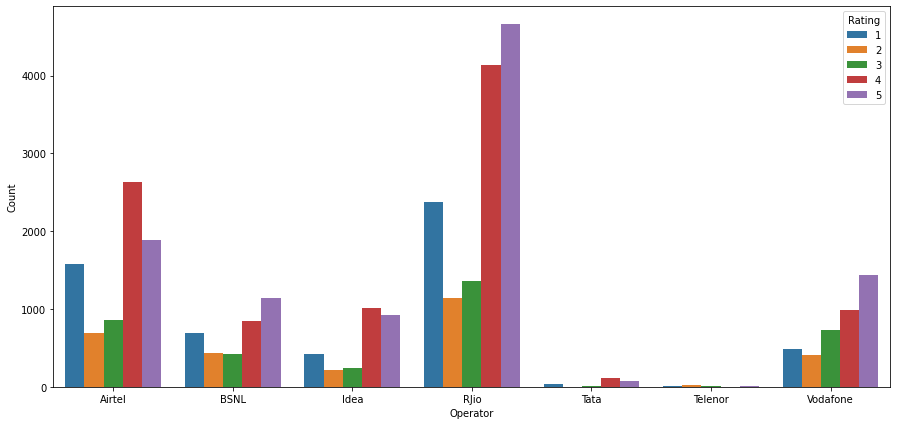

In [69]:
plt.figure(figsize=(15,7))
sns.barplot(rating_count.Operator,rating_count.Count,hue=rating_count.Rating)

In [70]:
fourG=call[call['Network Type']=='4G']
threeG=call[call['Network Type']=='3G']
twoG=call[call['Network Type']=='2G']

# 4G

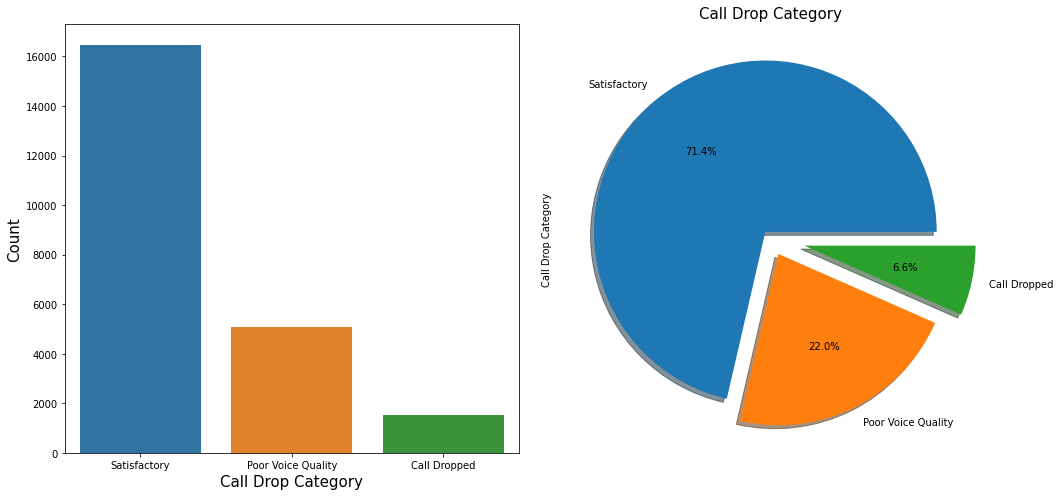

In [73]:
#4G
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(fourG['Call Drop Category'])
plt.xlabel('Call Drop Category',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
fourG['Call Drop Category'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.05,0.1,0.2])
plt.title('Call Drop Category',fontsize=15)
plt.tight_layout()
plt.show()

# 3G

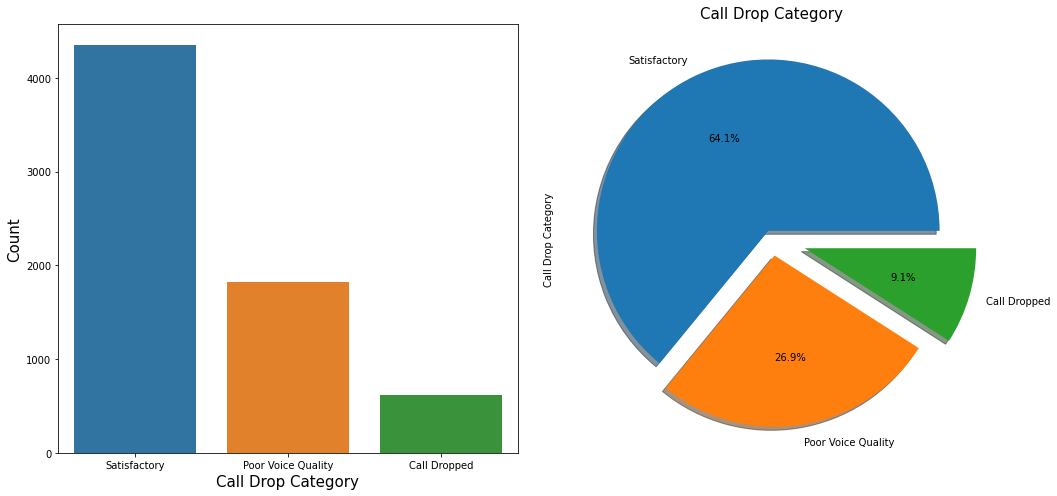

In [74]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(threeG['Call Drop Category'])
plt.xlabel('Call Drop Category',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
threeG['Call Drop Category'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.05,0.1,0.2])
plt.title('Call Drop Category',fontsize=15)
plt.tight_layout()
plt.show()

# 2G

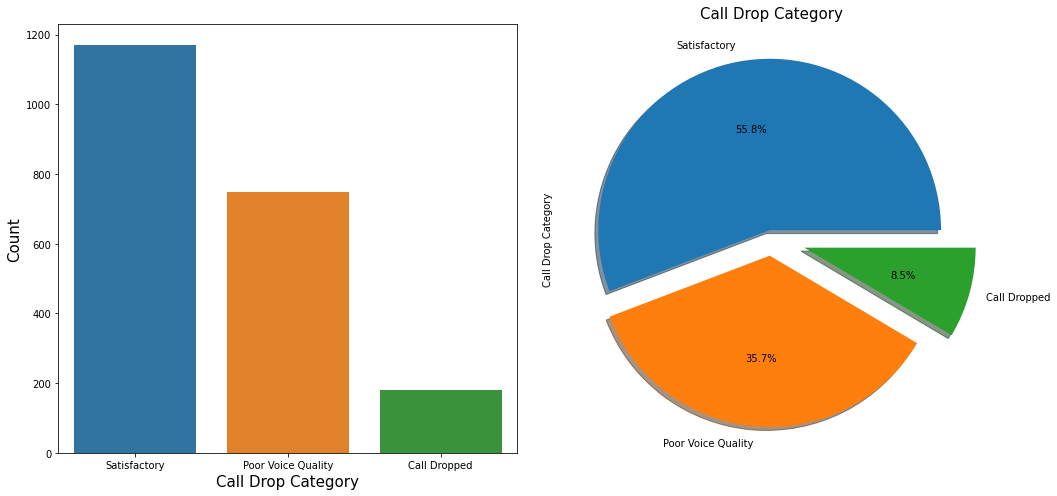

In [75]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(twoG['Call Drop Category'])
plt.xlabel('Call Drop Category',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
twoG['Call Drop Category'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.05,0.1,0.2])
plt.title('Call Drop Category',fontsize=15)
plt.tight_layout()
plt.show()

# Call drop % with operator wise

In [76]:
operator=call.Operator.unique()
operator

array(['RJio', 'BSNL', 'Airtel', 'Idea', 'Vodafone', 'Telenor', 'Tata'],
      dtype=object)

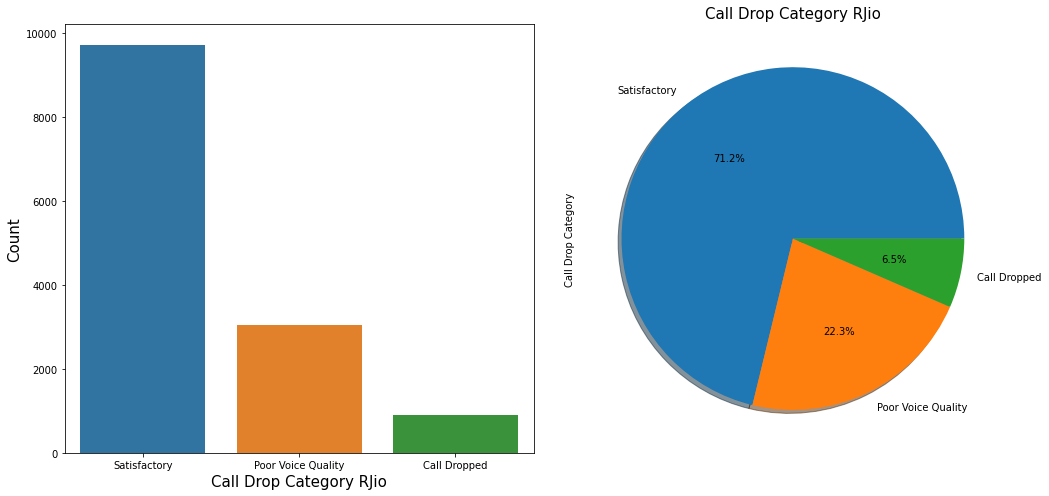

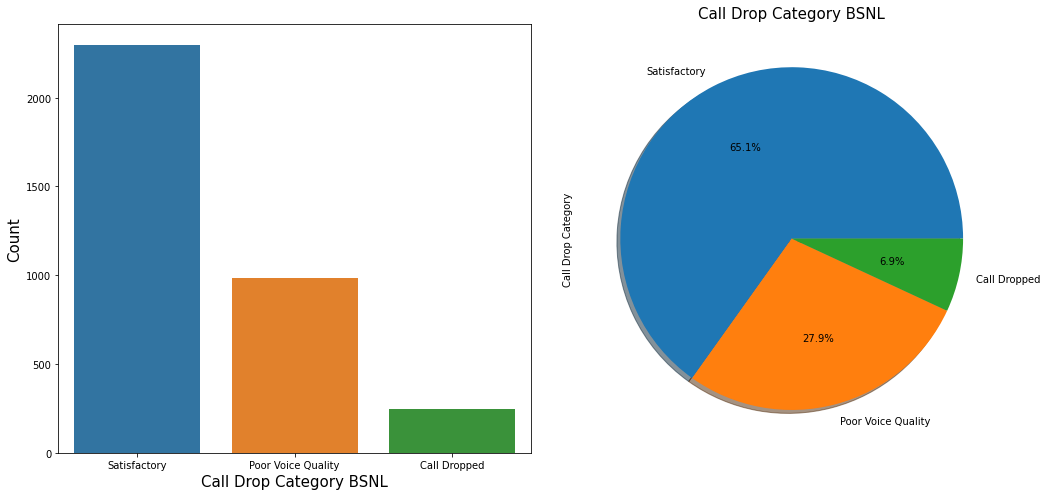

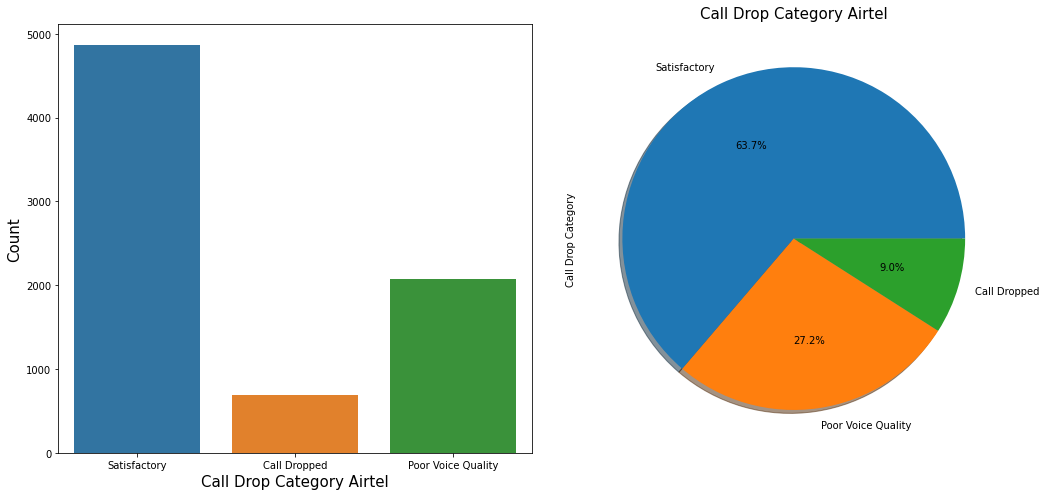

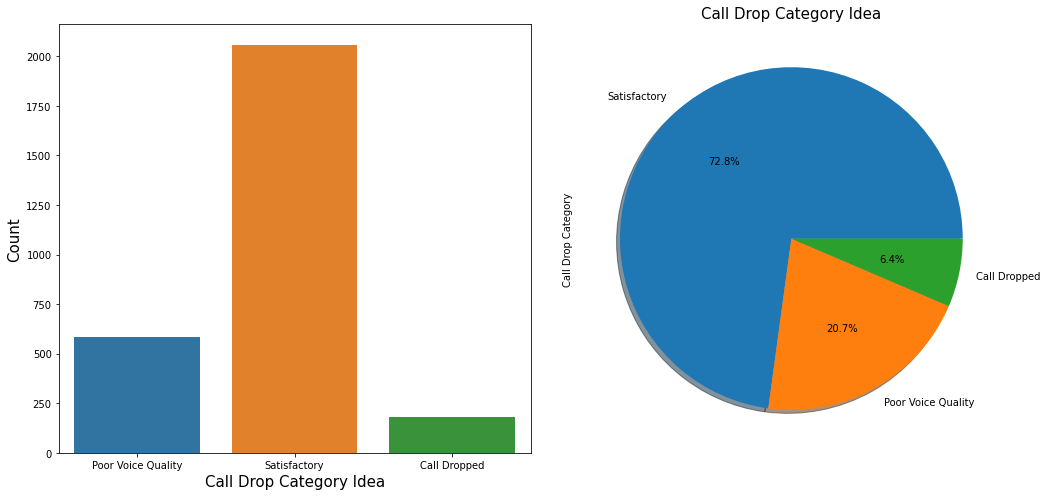

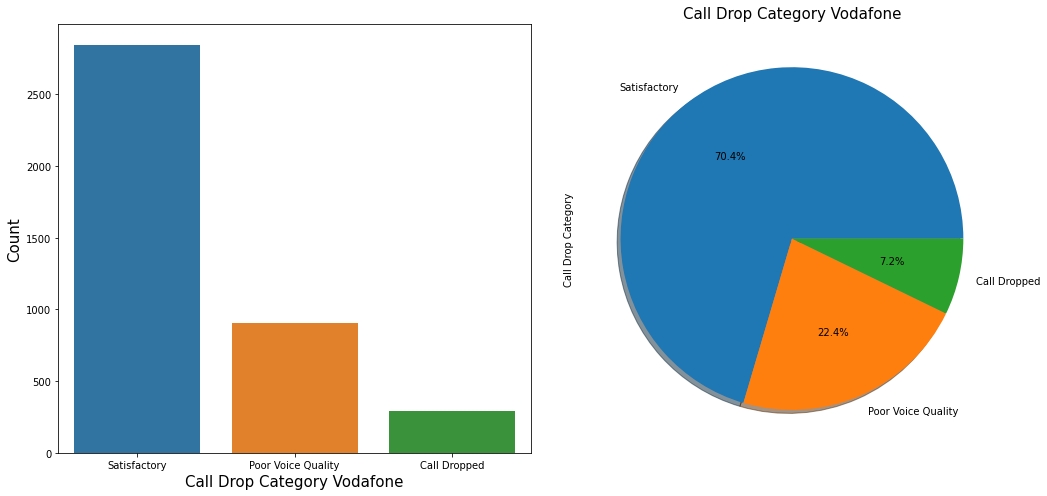

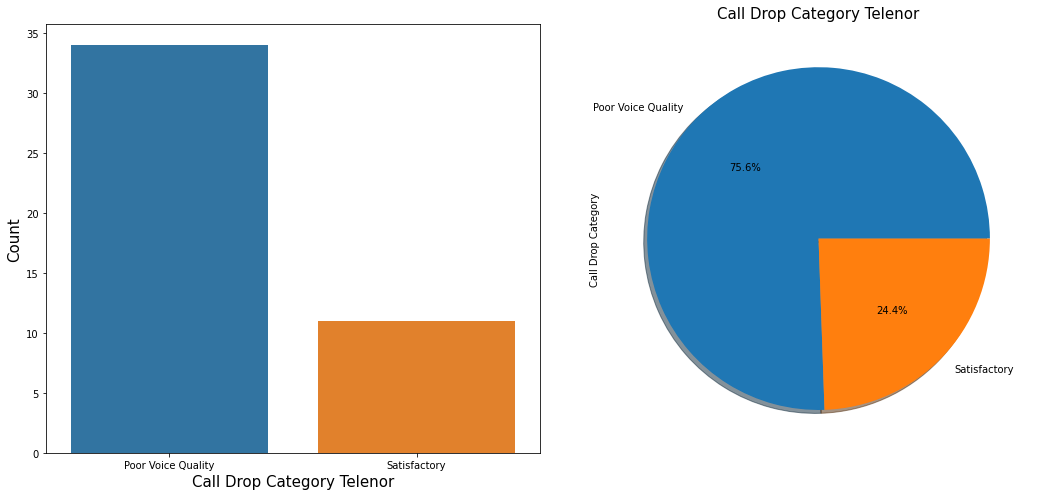

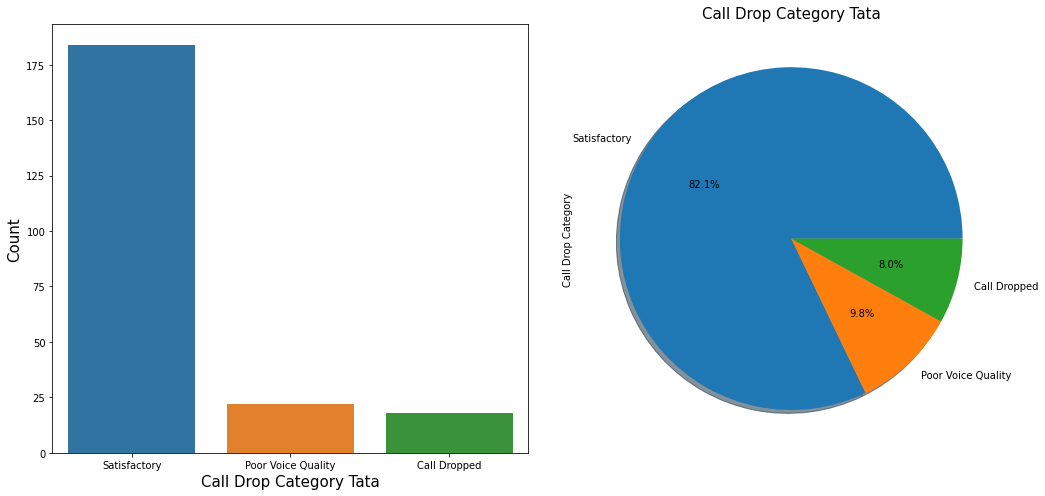

In [79]:
for i in operator:
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    sns.countplot(call[call.Operator==i]['Call Drop Category'])
    plt.xlabel('Call Drop Category '+ i,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.subplot(122)
    call[call.Operator==i]['Call Drop Category'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
    plt.title('Call Drop Category ' + i,fontsize=15)
    plt.tight_layout()
    plt.show()
    

` idea has least call drop as well as poor coverage % and airtel has highest call drop and poor coverage`

### `Multivarent`

In [107]:
call=call.replace(0.0,np.nan)
call=call.fillna(method='bfill')

In [108]:
call.Longitude=call.Longitude.apply(lambda x: -x if x<0 else x)


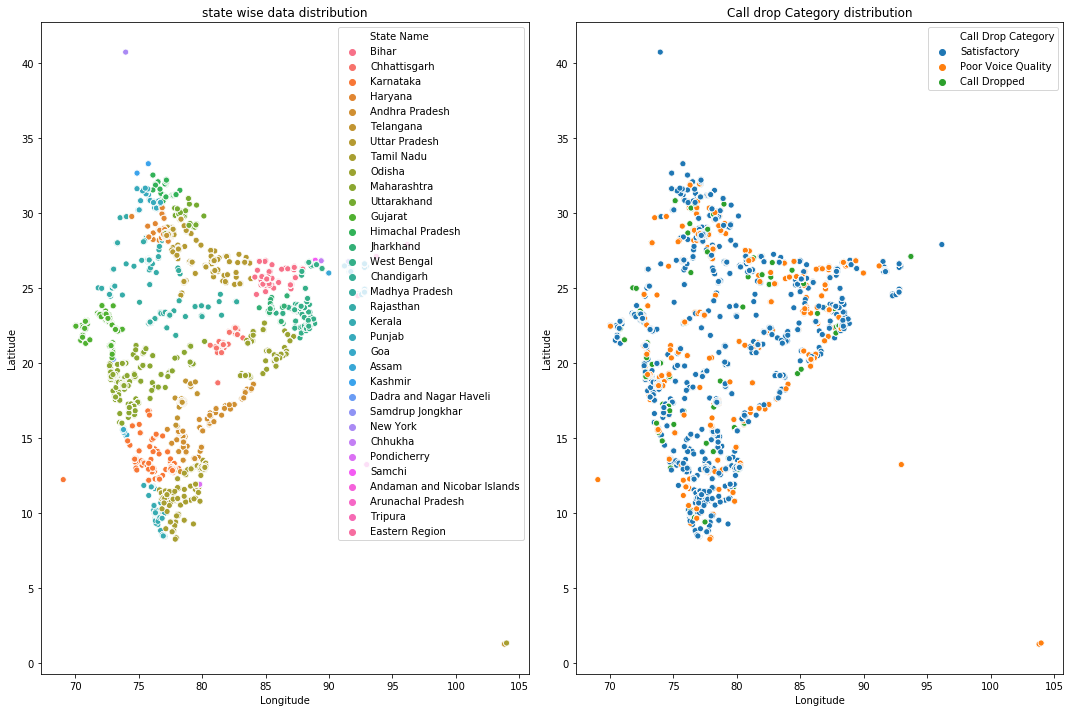

In [109]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.scatterplot(call.Longitude,call.Latitude,hue=call['State Name'])
plt.title('state wise data distribution')
plt.subplot(122)
sns.scatterplot(call.Longitude,call.Latitude,hue=call['Call Drop Category'])
plt.title('Call drop Category distribution')
plt.tight_layout()
plt.show()

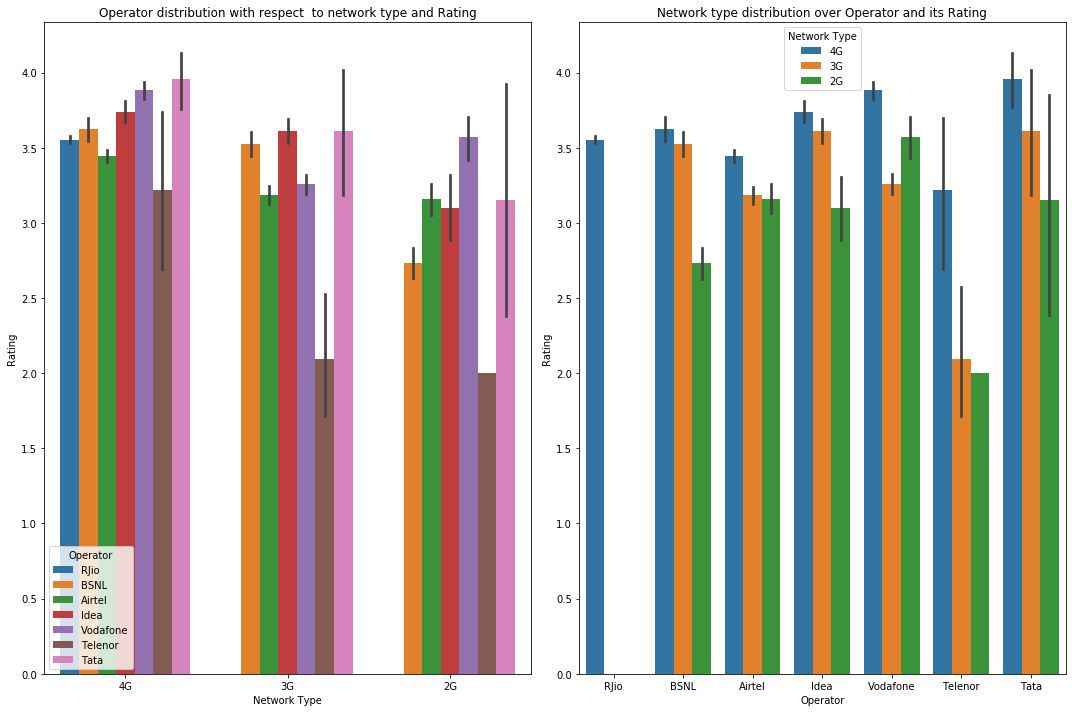

In [110]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.barplot(call['Network Type'],call['Rating'],hue=call['Operator'])
plt.title('Operator distribution with respect  to network type and Rating')
plt.subplot(122)
sns.barplot(call.Operator,call['Rating'],hue=call['Network Type'])
plt.title('Network type distribution over Operator and its Rating')
plt.tight_layout()
plt.show()

`1.very few sample availble for Telenor and TATA so i am going ignore its effects on graph,and focusing on only RJio voda idea bsnl and airtel'
'2. In 4g Vodafone has good quality maintainece but airtel has less in all 4g and 3g so Airtel has to focus on its quality maintainess in next month.`
`3. In 2g BSNL should look out its kpi and try to maintains better in next month`


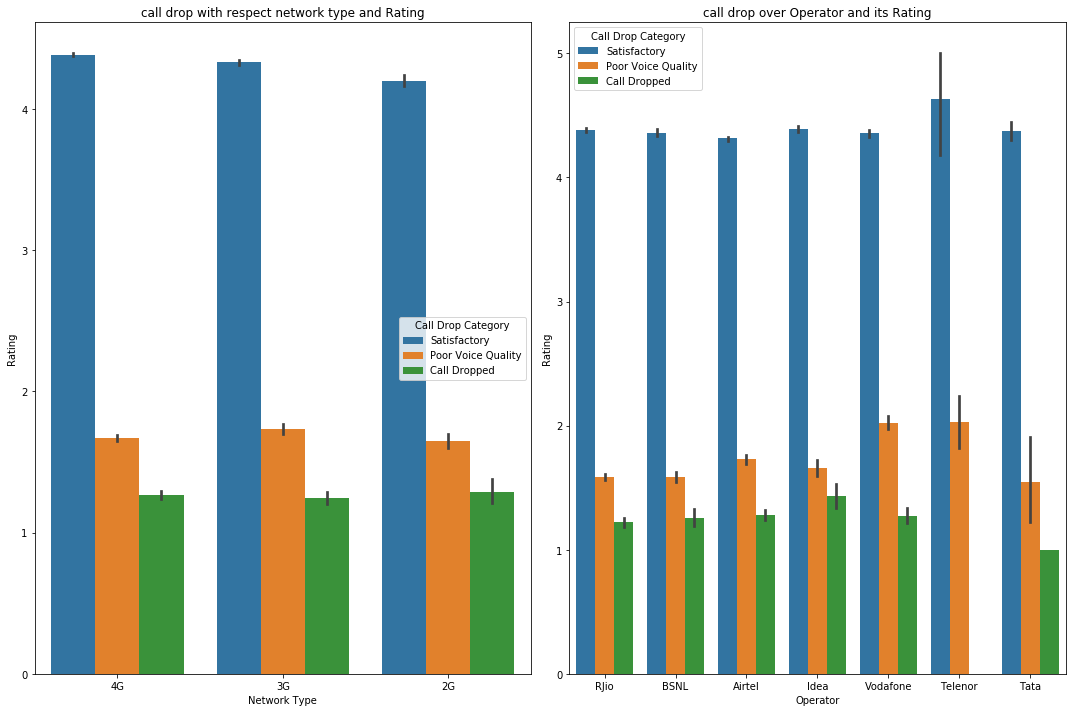

In [111]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.barplot(call['Network Type'],call['Rating'],hue=call['Call Drop Category'])
plt.title('call drop with respect network type and Rating')
plt.subplot(122)
sns.barplot(call.Operator,call['Rating'],hue=call['Call Drop Category'])
plt.title('call drop over Operator and its Rating')
plt.tight_layout()
plt.show()

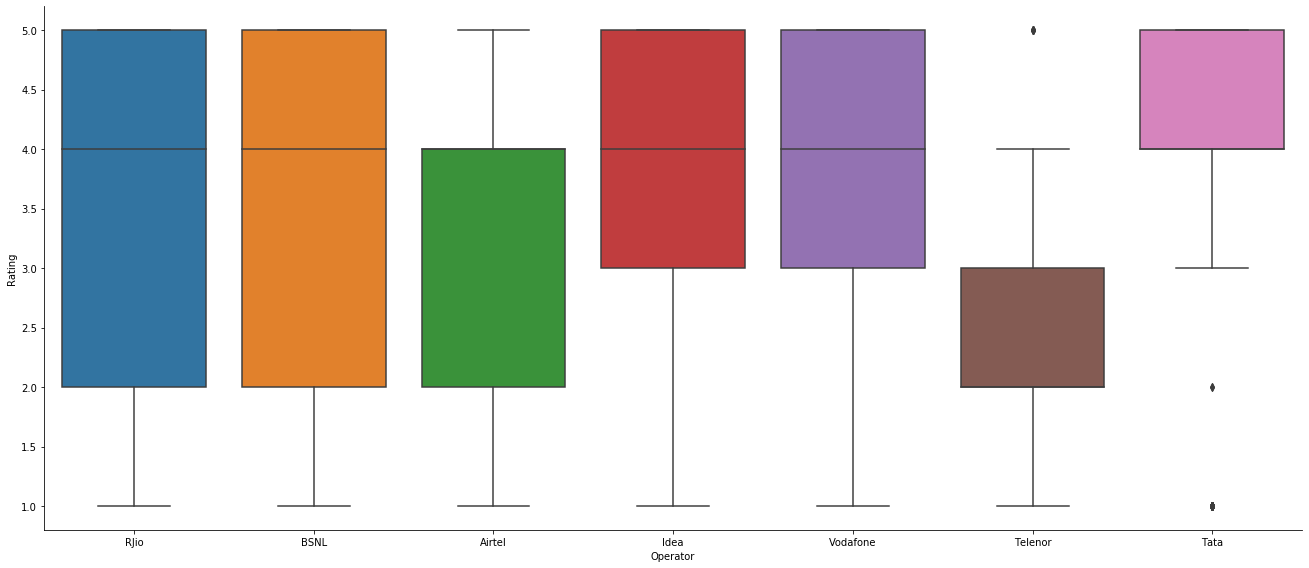

In [113]:
sns.factorplot(x="Operator", y='Rating', data=call, kind="box", size=8, aspect=float(16/7))

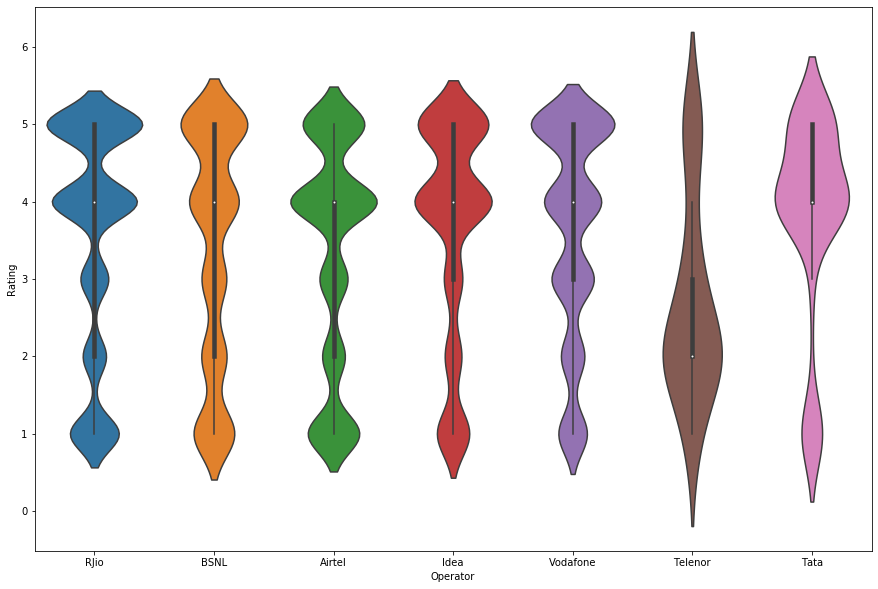

In [115]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Operator", y='Rating', data=call, kind="box", size=8, aspect=float(16/7))

# ` Data Import`

In [81]:
data=pd.read_csv('May18_myspeed.csv')
data.head()

,Operator,Technology,Testtype,Speed,SignalStrength,LicenseServiceArea
0,JIO,4G,download,53484,-62.0,UP East
1,JIO,4G,upload,4503,-62.0,UP East
2,IDEA,4G,download,11162,-111.0,Gujarat
3,IDEA,4G,download,5311,-110.0,Gujarat
4,IDEA,4G,download,9014,-105.0,Gujarat


In [103]:
data_speed=data.groupby(['Operator','Technology','LicenseServiceArea','Testtype']).agg({'Speed': lambda x:x.mean(), 'SignalStrength': lambda x:x.mean()}).reset_index()
data_speed.head()

,Operator,Technology,LicenseServiceArea,Testtype,Speed,SignalStrength
0,AIRTEL,3G,Andhra Pradesh,download,1845.002830,-83.329318
1,AIRTEL,3G,Andhra Pradesh,upload,1065.848335,-83.373139
2,AIRTEL,3G,Assam,download,2973.396610,-79.980392
3,AIRTEL,3G,Assam,upload,1098.658101,-80.196571
4,AIRTEL,3G,Bihar,download,1949.615089,-83.409268


In [114]:
data_consumed=data_speed[data_speed.Technology=='3G']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

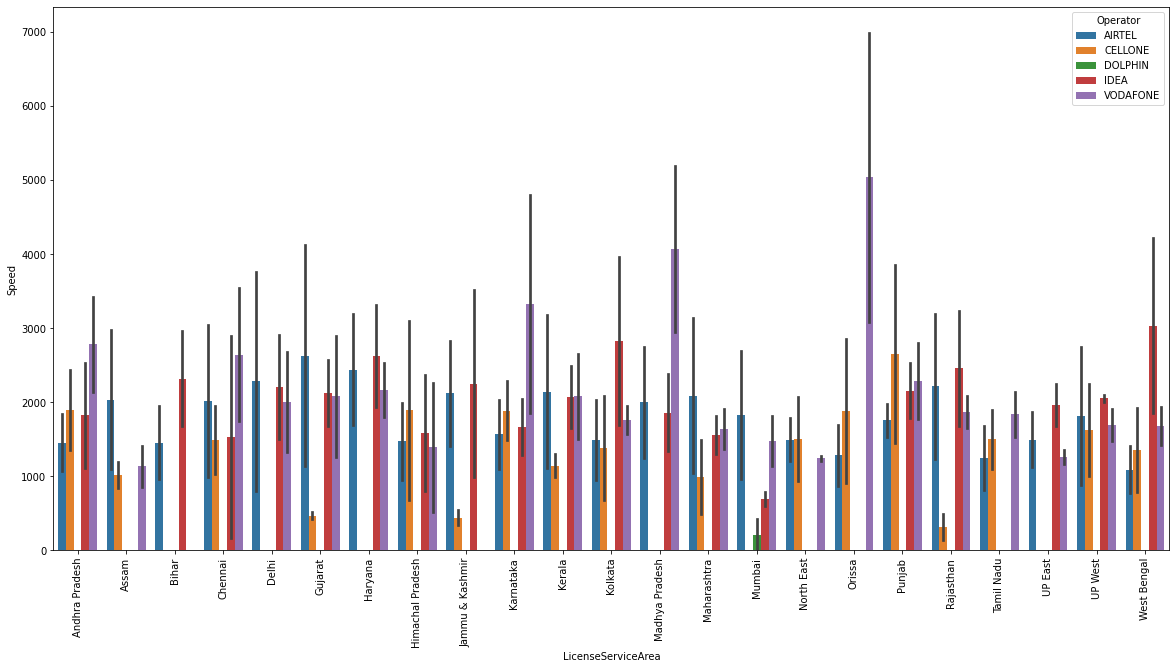

In [115]:
plt.figure(figsize=(20,10))
sns.barplot(data_consumed.LicenseServiceArea,data_consumed.Speed,hue=data_consumed.Operator)
plt.xticks(rotation=90)

In [83]:
data['LicenseServiceArea'].value_counts()

UP East             193372
Maharashtra         182446
Andhra Pradesh      160036
Madhya Pradesh      157512
Bihar               122858
Gujarat             121414
Rajasthan           105631
UP West             103761
Delhi                92712
West Bengal          81066
Kerala               80861
Punjab               75273
Tamil Nadu           66922
Karnataka            66256
Kolkata              55461
Haryana              52675
Orissa               45598
Mumbai               43431
Jammu & Kashmir      32498
Chennai              26068
Assam                24136
North East           20819
Himachal Pradesh     20797
Name: LicenseServiceArea, dtype: int64

In [38]:
round(data.groupby(['LicenseServiceArea','Testtype']).mean(),2)

Speed  SignalStrength
LicenseServiceArea Testtype                          
Andhra Pradesh     download  18870.94          -82.87
                   upload     4865.76          -82.86
Assam              download   6267.73          -94.61
                   upload     3170.25          -94.68
Bihar              download  29921.06          -75.81
                   upload     6154.63          -75.82
Chennai            download   8426.04          -91.51
                   upload     3431.83          -91.53
Delhi              download  11443.49          -87.96
                   upload     3206.89          -88.00
Gujarat            download  15163.58          -87.41
                   upload     4684.95          -87.47
Haryana            download  15502.35          -85.80
                   upload     5190.11          -85.82
Himachal Pradesh   download  11610.87          -91.84
                   upload     4770.17          -91.76
Jammu & Kashmir    download   9651.53          -89.54
                   upload     3486.88          -89.62
Karnataka          download   7608.27          -90.21
                   upload     2782.22          -90.19
Kerala             download   6877.30          -96.45
                   upload     2991.93          -96.45
Kolkata            download  15080.90          -86.68
                   upload     4632.24          -86.79
Madhya Pradesh     download  21454.01          -81.15
                   upload     6003.86          -81.19
Maharashtra        download  17326.77          -85.65
                   upload     4594.30          -85.69
Mumbai             download   9220.59          -89.54
                   upload     3509.18          -89.56
North East         download   4713.16          -92.24
                   upload     3063.25          -92.22
Orissa             download   9441.71          -90.39
                   upload     4219.75          -90.50
Punjab             download  19672.36          -83.62
                   upload     5856.15          -83.66
Rajasthan          download  20024.48          -83.20
                   upload     5502.35          -83.23
Tamil Nadu         download   9360.15          -92.54
                   upload     3261.75          -92.57
UP East            download  17526.10          -81.41
                   upload     5139.20          -81.44
UP West            download  13989.48          -84.27
                   upload     4624.12          -84.29
West Bengal        download  21445.88          -81.15
                   upload     5354.43          -81.19